In [1]:
from sklearn.datasets import make_moons

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-2-fa18575525b6>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
X , y =make_moons(n_samples=1000 , noise = 0.08)

In [4]:
X

array([[ 1.33447955, -0.56289475],
       [ 1.19021644, -0.55450079],
       [ 1.26332262, -0.42050688],
       ...,
       [ 0.06795163,  0.80330625],
       [-0.70742601,  0.71689856],
       [ 0.40115306,  0.90484139]])

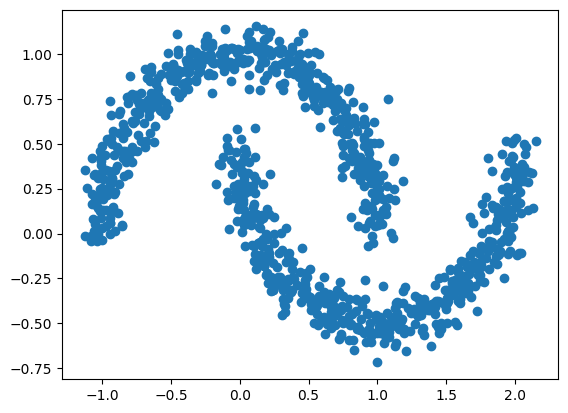

In [5]:
plt.scatter(X[:, 0] , X[: , 1])

In [7]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_scaled=std.fit_transform(X)

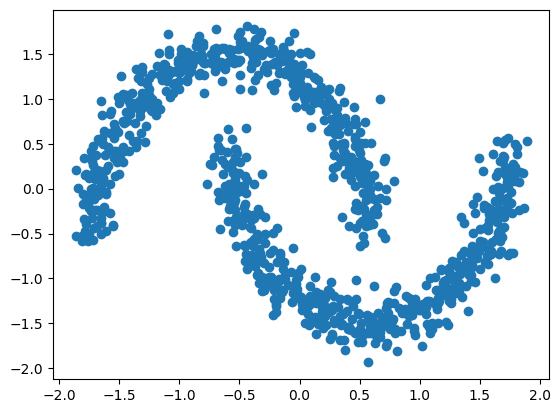

In [8]:
plt.scatter(X_scaled[: , 0] , X_scaled[: , 1])

In [15]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2)

In [16]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.2)

In [17]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,
        0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  0, -1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0

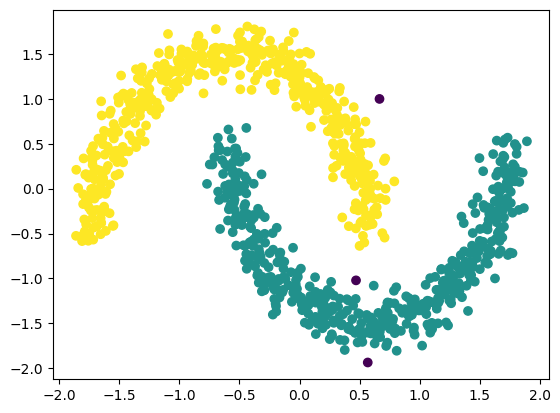

In [18]:
plt.scatter(X_scaled[: , 0] , X_scaled[: , 1] , c=dbscan.labels_)

In [28]:
eps_values=np.arange(0.10 , 0.50 , 0.01)
eps_values

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [33]:
from sklearn.metrics import silhouette_score

silhouette_coef=[]
for k in eps_values:
    dbscan=DBSCAN(eps=k)
    dbscan.fit(X_scaled)
    if len(set(dbscan.labels_)) > 1:
        score=silhouette_score(X_scaled , dbscan.labels_)
        silhouette_coef.append(score)
    else :
        silhouette_coef.append(0)

In [34]:
len(silhouette_coef)

40

In [35]:
len(eps_values)

40

In [36]:
data={
    'eps_value' : eps_values ,
    'silhouette_score' : silhouette_coef
}

In [38]:
eps_vs_silhoutte_df=pd.DataFrame(data = data )

In [39]:
eps_vs_silhoutte_df

,eps_value,silhouette_score
0,0.10,-0.098051
1,0.11,0.149644
2,0.12,0.224777
3,0.13,0.254058
4,0.14,0.255695
5,0.15,0.262161
6,0.16,0.266158
7,0.17,0.267658
8,0.18,0.277930
9,0.19,0.254082


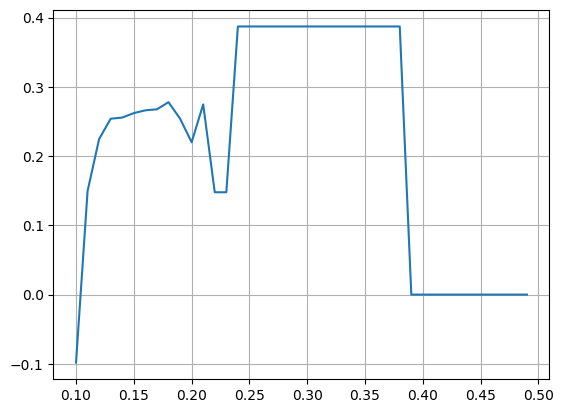

In [44]:
plt.plot(eps_vs_silhoutte_df.iloc[: , 0] , eps_vs_silhoutte_df.iloc[: , 1])
plt.grid()

In [45]:
dbscan=DBSCAN(eps=0.30)

In [47]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [49]:
dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

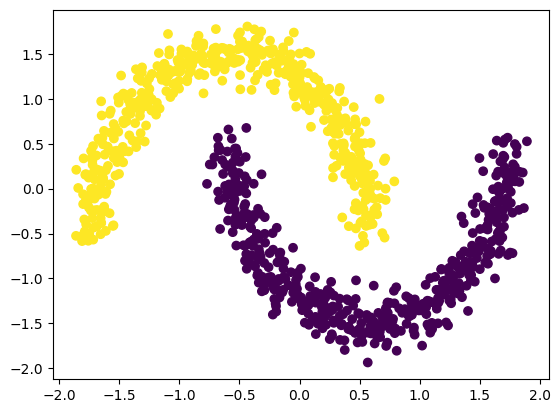

In [51]:
plt.scatter(X_scaled[: , 0] , X_scaled[: , 1] , c=dbscan.labels_)